* 하나의 logistic regression unit으로는 XOR 문제를 풀 수 없다.

$$XW ==> sigmoid ==> Y$$

* 그러나 이것을 하나가 아니라 두개, 세개로 만들면 XOR 문제를 풀 수 있다. 이것이 Nueral Net이다.

In [17]:
import numpy as np

w1 = np.array([[5], [5]])
b1 = np.array([-8])

w2 = np.array([[-7], [-7]])
b2 = np.array([3])

w3 = np.array([[-11], [-11]])
b3 = np.array([6])

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def XOR_SOL(x1, x2):
    y1 = sigmoid(np.matmul([x1, x2], w1) + b1) 
    y2 = sigmoid(np.matmul([x1, x2], w2) + b2)
    y_hat = np.matmul(np.concatenate([y1, y2]), w3) + b3 # 약 -5
    XOR = sigmoid(y_hat)
    return XOR

# x1, x2 = 0, 0
XOR_0_0 = XOR_SOL(0, 0)
print(XOR_0_0)  # 0에 가까운 수

# x1 = 0, x2 = 1
XOR_0_1 = XOR_SOL(0, 1)
print(XOR_0_1)  # 1에 가까운 수

# x1 = 1, x2 = 0
XOR_1_0 = XOR_SOL(1, 0)
print(XOR_1_0) # 1에 가까운 수

# x1 = 1, x2 = 1
XOR_1_1 = XOR_SOL(1, 1)
print(XOR_1_1) # 0에 가까운 수

[0.01118422]
[0.99493572]
[0.99493572]
[0.02438853]


첫 레이어에서 input에 대한 weight, bias 유닛 두개가 사용되고(시그모이드 포함), 두번째 레이어에서 하나의 weight, bias, 시그모이드 유닛 사용

이것이 뉴럴 네트워크의 기본적인 개념이다.

* 첫 레이어의 형태는 Multinomial classification과 유사하다. 

### 위의 XOR 문제는 어떻게 학습시킬 수 있을까?

* Cost Functin and Gradient Descent Algorithm 을 적용하려면 미분이 필요한데, 뉴럴 네트워크의 경우 미분이 복잡해 진다. (계산량이 많아지고 추정이 어려워진다)
* 이 문제를 해결하는 방법이 **Backpropagation**이다.

$$$$
* 출력값과 실제값 간의 오류인 cost 함수값을 뒤에서부터 앞으로 쭉 돌려서 미분값과 실제로 무엇을 적용하여 계산하겠다는 것이 이 알고리즘이다.

### Back propagation(chain rule)

$$ f = WX + b $$
$$g = WX$$ $$f = g + b$$

즉, w, x ==> g + b ==> f 가 되는 형태가 된다.

* 여기에서 w, x, b 가 f에 미치는 영향을 구하고 싶은데 이것은 각각의 미분 형태(chain rule)가 된다.
* 여기에서 미분 값의 의미는, 예를 들어 f를 w에 대하여 미분한 값이 5이면 w가 갖는 영향력은 5배인 셈이다.

* back propagation의 방법은 가장 마지막 단계서부터 미분 값을 구하고, 그 다음 단계에서 다시 미분값을 구하고.. 하는 과정을 되풀이하는데, 첫 input에서 앞 g(x)에 미치는 영향을 아는데 앞 단계의 미분값을 계속해서 곱하면 최종 값에 대한 미분값을 구할 수 있다.

### Back propagation in Tensorflow

* tensorflow에서는 모든 미분값이 그래프에 해당한다.
* 예를 들어 다음과 같은 hypothesis를 만든다면, 

**hypothesis = tf.sigmoid(tf.matmul(L2, W2) + b2)**

* tensorflow에서는 위의 식에서 적용된 각각의 연산에 대해 그래프를 갖는다. 

* 실제, 필요한 것은 코스트 함수의 back propagation이므로, 

**cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))**

* 위의 식을 구성하는 각각의 연산을 tensorflow에서는 그래프로 만든다. 이렇게 만든 이유는 각 노드에서 back propagation의 미분을 실행하기 위한 것이다.

* tensorflow를 이용하면 back propagation을 쉽게 구현할 수 있다.


### 예제 1. NN 적용하지 않고 Logistic Regression으로 XOR 문제 풀기

In [20]:
import tensorflow as tf

In [21]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [29]:
# placeholders
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Variables
W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Model
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost function / optimize
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y, predicted), dtype=tf.float32))

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    
    # Accuracy YYreport
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("Hypothesis:", h, "\nCorrect(Y):", c, "\nAccuracy:", a)

Instructions for updating:
Use tf.cast instead.
0 1.1605424 [[-0.05805135]
 [-1.5317961 ]]
100 0.704939 [[ 0.37121135]
 [-0.48501307]]
200 0.6964901 [[ 0.20373532]
 [-0.25619453]]
300 0.69411325 [[ 0.10555151]
 [-0.14053959]]
400 0.69342667 [[ 0.0539563 ]
 [-0.07756864]]
500 0.69322854 [[ 0.02716661]
 [-0.04310482]]
600 0.6931711 [[ 0.01339169]
 [-0.02414959]]
700 0.69315434 [[ 0.00639701]
 [-0.01365822]]
800 0.6931494 [[ 0.00290636]
 [-0.00780743]]
900 0.6931479 [[ 0.0012077 ]
 [-0.00451575]]
1000 0.6931474 [[ 0.00041235]
 [-0.00264518]]
1100 0.6931473 [[ 6.3142485e-05]
 [-1.5702288e-03]]
1200 0.69314724 [[-7.2344825e-05]
 [-9.4489305e-04]]
1300 0.6931472 [[-0.0001102 ]
 [-0.00057633]]
1400 0.6931472 [[-0.00010722]
 [-0.00035622]]
1500 0.6931472 [[-8.9898385e-05]
 [-2.2290958e-04]]
1600 0.6931472 [[-7.0038172e-05]
 [-1.4108434e-04]]
1700 0.6931472 [[-5.227896e-05]
 [-9.021921e-05]]
1800 0.6931472 [[-3.795448e-05]
 [-5.820408e-05]]
1900 0.6931472 [[-2.7045338e-05]
 [-3.7856553e-05]]
20

NN을 적용하지 않을 경우 XOR 문제를 해결할 수 없다. 코스트 함수값이 발산되고 정확도도 50%에 불과하다.

### 예제 2. NN을 적용한 XOR 문제

In [30]:
# placeholders
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Variables + Layers + Model  : layer 2개 설정
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')  # shape 주의 !! W2에 out = 2 값을 보내야 하기 때문에 [2(in), 2(out)] 필요
b1 = tf.Variable(tf.random_normal([1]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b)

W2 = tf.Variable(tf.random_normal([2, 1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost function / optimize
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y, predicted), dtype=tf.float32))

# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
    
    # Accuracy YYreport
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("Hypothesis:", h, "\nCorrect(Y):", c, "\nAccuracy:", a)

0 0.77553284 [array([[0.06075551, 2.3827236 ],
       [1.4311393 , 0.607598  ]], dtype=float32), array([[0.8864578 ],
       [0.20112196]], dtype=float32)]
100 0.6935322 [array([[-0.07759412,  2.3787746 ],
       [ 1.3556339 ,  0.60448617]], dtype=float32), array([[ 0.67148   ],
       [-0.08143961]], dtype=float32)]
200 0.69256365 [array([[-0.16770668,  2.3721185 ],
       [ 1.3410125 ,  0.60116446]], dtype=float32), array([[ 0.65637845],
       [-0.08310802]], dtype=float32)]
300 0.6916222 [array([[-0.2597141,  2.3656075],
       [ 1.332415 ,  0.5984189]], dtype=float32), array([[ 0.6596647 ],
       [-0.07927981]], dtype=float32)]
400 0.69058704 [array([[-0.35534012,  2.3593214 ],
       [ 1.3293126 ,  0.59636533]], dtype=float32), array([[ 0.67664933],
       [-0.07769073]], dtype=float32)]
500 0.6893962 [array([[-0.45531747,  2.3530617 ],
       [ 1.3327413 ,  0.5949656 ]], dtype=float32), array([[ 0.70734364],
       [-0.07813802]], dtype=float32)]
600 0.68797797 [array([[-0.5605

5300 0.0492628 [array([[-5.880798 ,  5.195905 ],
       [ 5.4130282, -5.029159 ]], dtype=float32), array([[7.3120317],
       [7.306262 ]], dtype=float32)]
5400 0.047098648 [array([[-5.905832 ,  5.230065 ],
       [ 5.4458103, -5.073695 ]], dtype=float32), array([[7.3935986],
       [7.395901 ]], dtype=float32)]
5500 0.045106698 [array([[-5.9298954,  5.262733 ],
       [ 5.4771414, -5.1159015]], dtype=float32), array([[7.472294 ],
       [7.4817953]], dtype=float32)]
5600 0.04326785 [array([[-5.9530587,  5.294022 ],
       [ 5.507129 , -5.155987 ]], dtype=float32), array([[7.548294],
       [7.564236]], dtype=float32)]
5700 0.041565724 [array([[-5.9753795,  5.32403  ],
       [ 5.535872 , -5.1941304]], dtype=float32), array([[7.621758],
       [7.643484]], dtype=float32)]
5800 0.039985918 [array([[-5.996912 ,  5.3528514],
       [ 5.5634556, -5.2304993]], dtype=float32), array([[7.6928387],
       [7.719769 ]], dtype=float32)]
5900 0.038516257 [array([[-6.0177064,  5.3805666],
       [

코스트가 상당히 감소하였고, 정확도도 100%이다.

### 예제3. Wide NN for XOR

In [34]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')  # 입력 값에 대한 첫 레이어에서 logit을 10개로 증가시킴
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y, predicted), dtype=tf.float32))


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run([W1, W2]))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("Hypothesis:", h, "\nCorrect(Y):", c, "\nAccuracy:", a)

0 0.8153336 [array([[ 0.49538633, -0.56764156, -0.6952083 ,  1.2998271 , -0.9617914 ,
         0.12046593, -0.60669607, -0.00236011, -1.1731219 ,  0.7009312 ],
       [-0.5410845 ,  0.2154973 ,  0.9430286 , -0.01283407,  1.2392143 ,
        -0.4015798 , -0.8205541 ,  1.5526536 , -1.0247597 , -0.5562727 ]],
      dtype=float32), array([[-0.4050699 ],
       [-0.8770203 ],
       [ 0.5991179 ],
       [ 0.37412995],
       [-0.29518372],
       [ 0.09515615],
       [-0.51667744],
       [-2.1156437 ],
       [ 0.9953386 ],
       [ 1.8701094 ]], dtype=float32)]
100 0.70346314 [array([[ 0.48161304, -0.53562874, -0.64413404,  1.2979484 , -0.9420293 ,
         0.11315732, -0.6215908 , -0.06890074, -1.1452521 ,  0.657731  ],
       [-0.5308634 ,  0.15803045,  0.9061917 ,  0.03761855,  1.2291648 ,
        -0.39266926, -0.871186  ,  1.5492588 , -0.9703464 , -0.5956585 ]],
      dtype=float32), array([[-0.3615556 ],
       [-0.7430714 ],
       [ 0.7355458 ],
       [ 0.5537858 ],
       [-0.0

1500 0.2847544 [array([[ 0.44727275, -0.11841796, -0.37251255,  1.3123137 , -3.2468863 ,
         0.06469338, -1.5374674 , -1.7484677 , -0.9838092 ,  2.768993  ],
       [-0.35307458, -0.08567804,  0.57356066,  0.49439022,  2.7436306 ,
        -0.36973438, -1.9857327 ,  1.9427823 , -0.5539966 , -3.3333328 ]],
      dtype=float32), array([[-0.38915956],
       [-0.61286175],
       [ 0.46119377],
       [ 0.45911387],
       [ 3.6284602 ],
       [-0.06520626],
       [-1.6186842 ],
       [-2.5483227 ],
       [ 0.5092628 ],
       [ 3.7715168 ]], dtype=float32)]
1600 0.24193513 [array([[ 0.45600933, -0.08728412, -0.37831944,  1.3128663 , -3.4821398 ,
         0.06862336, -1.6180758 , -1.9070936 , -0.98259133,  2.922616  ],
       [-0.3428053 , -0.0893406 ,  0.56400865,  0.5070197 ,  2.9388132 ,
        -0.36999545, -2.0756176 ,  2.0329947 , -0.5411808 , -3.5125604 ]],
      dtype=float32), array([[-0.40399945],
       [-0.6225121 ],
       [ 0.44409525],
       [ 0.43565902],
       [

3000 0.053297494 [array([[ 0.5692185 ,  0.18804786, -0.4485131 ,  1.3142962 , -5.0797596 ,
         0.13304317, -2.1938026 , -2.8541436 , -0.98266524,  3.8858886 ],
       [-0.24129702, -0.08603141,  0.49321955,  0.57040983,  4.257258  ,
        -0.36717817, -2.7145936 ,  3.0508726 , -0.45917055, -4.6544094 ]],
      dtype=float32), array([[-0.5364982 ],
       [-0.7192003 ],
       [ 0.38257506],
       [ 0.29810935],
       [ 7.028369  ],
       [-0.20792185],
       [-2.5239983 ],
       [-3.6758928 ],
       [ 0.49100608],
       [ 5.5945687 ]], dtype=float32)]
3100 0.049924202 [array([[ 0.5751842 ,  0.19962455, -0.45171738,  1.3143225 , -5.1337843 ,
         0.13647102, -2.2159977 , -2.8845546 , -0.9828381 ,  3.9187403 ],
       [-0.23612088, -0.08490892,  0.49022332,  0.5721412 ,  4.302177  ,
        -0.36675665, -2.7379863 ,  3.0952675 , -0.4563013 , -4.693534  ]],
      dtype=float32), array([[-0.5421486 ],
       [-0.72370476],
       [ 0.38272235],
       [ 0.29511112],
     

4600 0.024720546 [array([[ 0.64670527,  0.3251256 , -0.4881425 ,  1.3145815 , -5.66729   ,
         0.175493  , -2.4485333 , -3.1915011 , -0.9851989 ,  4.246164  ],
       [-0.17449844, -0.07065029,  0.4564372 ,  0.58867776,  4.747773  ,
        -0.3607186 , -2.9787784 ,  3.5578034 , -0.42671975, -5.08779   ]],
      dtype=float32), array([[-0.6067409 ],
       [-0.7759756 ],
       [ 0.39541265],
       [ 0.2734303 ],
       [ 8.40405   ],
       [-0.24000727],
       [-2.8617072 ],
       [-4.2145605 ],
       [ 0.5018352 ],
       [ 6.346194  ]], dtype=float32)]
4700 0.023878325 [array([[ 0.6506321 ,  0.3314034 , -0.49006507,  1.3145934 , -5.6916685 ,
         0.1775166 , -2.459749  , -3.2058787 , -0.98534197,  4.2612467 ],
       [-0.1711499 , -0.06988426,  0.45467257,  0.58941907,  4.7681975 ,
        -0.36035362, -2.9902382 ,  3.579867  , -0.4253016 , -5.106161  ]],
      dtype=float32), array([[-0.6101887 ],
       [-0.7787735 ],
       [ 0.39655098],
       [ 0.27280754],
     

6100 0.016031722 [array([[ 0.6989402 ,  0.4044189 , -0.5133253 ,  1.3147603 , -5.9610343 ,
         0.2014176 , -2.5871592 , -3.3671548 , -0.9871357 ,  4.428607  ],
       [-0.13033953, -0.06103079,  0.43349862,  0.5976116 ,  4.994039  ,
        -0.3557499 , -3.1197333 ,  3.8281724 , -0.4091368 , -5.3112125 ]],
      dtype=float32), array([[-0.65233856],
       [-0.81272376],
       [ 0.41307437],
       [ 0.2683141 ],
       [ 9.158451  ],
       [-0.2541429 ],
       [-3.0444107 ],
       [-4.5269437 ],
       [ 0.51104057],
       [ 6.7654533 ]], dtype=float32)]
6200 0.015656576 [array([[ 0.70200604,  0.408812  , -0.51478237,  1.3147722 , -5.9764547 ,
         0.2028746 , -2.5946476 , -3.376528  , -0.98725426,  4.4382296 ],
       [-0.12777485, -0.06051037,  0.43218318,  0.5980826 ,  5.0069737 ,
        -0.35545358, -3.1273096 ,  3.8426218 , -0.4081813 , -5.3230658 ]],
      dtype=float32), array([[-0.655007  ],
       [-0.8148509 ],
       [ 0.41425753],
       [ 0.26819602],
     

7600 0.011750042 [array([[ 0.74105144,  0.4625846 , -0.5332151 ,  1.3147948 , -6.1586223 ,
         0.22085293, -2.6847258 , -3.4884815 , -0.9887582 ,  4.5522804 ],
       [-0.09538859, -0.05437171,  0.4156495 ,  0.6036881 ,  5.159798  ,
        -0.351676  , -3.2181954 ,  4.0150294 , -0.396612  , -5.46402   ]],
      dtype=float32), array([[-0.689045  ],
       [-0.8416772 ],
       [ 0.43043894],
       [ 0.26804996],
       [ 9.693365  ],
       [-0.26319754],
       [-3.173071  ],
       [-4.75431   ],
       [ 0.5188891 ],
       [ 7.065133  ]], dtype=float32)]
7700 0.011541702 [array([[ 0.74360317,  0.4659679 , -0.53441375,  1.3147948 , -6.169693  ,
         0.22199221, -2.6902976 , -3.4953613 , -0.98885953,  4.559238  ],
       [-0.09329012, -0.05400291,  0.414581  ,  0.604032  ,  5.169087  ,
        -0.35142958, -3.2238026 ,  4.0256057 , -0.39589104, -5.4726396 ]],
      dtype=float32), array([[-0.69127613],
       [-0.843414  ],
       [ 0.431561  ],
       [ 0.26811832],
     

9100 0.009228134 [array([[ 0.77673984,  0.508598  , -0.54994804,  1.3147948 , -6.3055215 ,
         0.2364186 , -2.7595696 , -3.5805    , -0.99015874,  4.6448293 ],
       [-0.06624702, -0.04958083,  0.4008061 ,  0.60829204,  5.2830606 ,
        -0.3482482 , -3.29339   ,  4.156195  , -0.3868644 , -5.5789204 ]],
      dtype=float32), array([[-0.7203641 ],
       [-0.8657884 ],
       [ 0.4467474 ],
       [ 0.2697355 ],
       [10.106236  ],
       [-0.26977593],
       [-3.2719831 ],
       [-4.932687  ],
       [ 0.5256676 ],
       [ 7.2977085 ]], dtype=float32)]
9200 0.009096704 [array([[ 0.7789428 ,  0.5113512 , -0.55097985,  1.3147948 , -6.3140664 ,
         0.23735456, -2.7639847 , -3.5859034 , -0.990248  ,  4.650234  ],
       [-0.06446279, -0.04931096,  0.3998958 ,  0.6085629 ,  5.290231  ,
        -0.34803817, -3.2978191 ,  4.164461  , -0.38628462, -5.585639  ]],
      dtype=float32), array([[-0.72230685],
       [-0.86726475],
       [ 0.44779482],
       [ 0.26988712],
     

cost 함수 값이 상당히 줄어들었다. 마찬가지로 예측율도 100%

### 예제 4. Deep NN for XOR

In [36]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2, 10]), name='weight1')
b1 = tf.Variable(tf.random_normal([10]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name='weight2')
b2 = tf.Variable(tf.random_normal([10]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([10, 10]), name='weight3')
b3 = tf.Variable(tf.random_normal([10]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W3 = tf.Variable(tf.random_normal([10, 1]), name='weight4')
b3 = tf.Variable(tf.random_normal([1]), name='bias4')
hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)

cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(Y, predicted), dtype=tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        
        if step % 100 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("Hypothesis:", h, "\nCorrect(Y):", c, "\nAccuracy:", a)

0 0.7104667
100 0.6881877
200 0.6818484
300 0.67514515
400 0.66726476
500 0.6572299
600 0.6437088
700 0.624719
800 0.59706575
900 0.55534565
1000 0.49109548
1100 0.39675882
1200 0.2828041
1300 0.18405473
1400 0.119623184
1500 0.08178827
1600 0.05927035
1700 0.045154024
1800 0.035798438
1900 0.029284844
2000 0.02455834
2100 0.02100866
2200 0.018265687
2300 0.016094882
2400 0.014341853
2500 0.012901635
2600 0.011700755
2700 0.010686523
2800 0.009820209
2900 0.0090728905
3000 0.008422585
3100 0.007852163
3200 0.007348353
3300 0.006900447
3400 0.0065000607
3500 0.006140209
3600 0.0058152284
3700 0.0055205007
3800 0.005252119
3900 0.0050067673
4000 0.004781748
4100 0.0045746835
4200 0.0043835854
4300 0.00420677
4400 0.004042658
4500 0.0038900767
4600 0.0037478087
4700 0.0036149085
4800 0.0034904892
4900 0.0033737854
5000 0.0032641664
5100 0.0031609428
5200 0.0030636333
5300 0.002971789
5400 0.002884944
5500 0.0028027392
5600 0.0027247397
5700 0.0026507352
5800 0.002580367
5900 0.0025134394


cost 함수값도 훨씬 작아지고 정확도도 100%

### 예제 4. Wide and Deep NN for MNIST

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf

In [15]:
X = tf.placeholder(tf.float32, shape=[None, 28 * 28])
Y = tf.placeholder(tf.float32, shape=[None, nb_classes])

# variables and layers and hypothesis
W1 = tf.Variable(tf.random_normal([28 * 28, 128]), name='weight1')
b1 = tf.Variable(tf.random_normal([128]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([128, 64]), name='weight2')
b2 = tf.Variable(tf.random_normal([64]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([64, 64]), name='weight3')
b3 = tf.Variable(tf.random_normal([64]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([64, 32]), name='weight4')
b4 = tf.Variable(tf.random_normal([32]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([32, nb_classes]), name='weight5')
b5 = tf.Variable(tf.random_normal([nb_classes]), name="bias5")
hypothesis = tf.sigmoid(tf.matmul(layer4, W5) + b5)

# cost / train
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

# Launch the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(num_epochs):
    cost_avg = 0
    
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
        cost_avg += cost_val / num_iterations
        
    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, cost_avg))

Epoch: 0001, Cost: 0.057673828
Epoch: 0002, Cost: 0.005404381
Epoch: 0003, Cost: 0.003163203
Epoch: 0004, Cost: 0.002241437
Epoch: 0005, Cost: 0.001735239
Epoch: 0006, Cost: 0.001415183
Epoch: 0007, Cost: 0.001194614
Epoch: 0008, Cost: 0.001033101
Epoch: 0009, Cost: 0.000909905
Epoch: 0010, Cost: 0.000813270
Epoch: 0011, Cost: 0.000734676
Epoch: 0012, Cost: 0.000669915
Epoch: 0013, Cost: 0.000615474
Epoch: 0014, Cost: 0.000569494
Epoch: 0015, Cost: 0.000529673


In [16]:
print("Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Accuracy: 0.1309


### 코스트 함수 값은 0에 가까운 값으로 수렴되었으나, 테스트 데이터에 대한 정확도는 13%에 불과함

In [17]:
import numpy as np
idx = np.random.choice(mnist.test.num_examples, 1)[0]
print("Label:", sess.run(tf.argmax(mnist.test.labels[idx:idx+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[idx:idx+1]}))
idx

Label: [3]
Prediction: [1]


4758

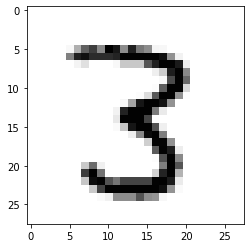

In [18]:
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(mnist.test.images[idx: idx+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()